# Summary of results

In [2]:
import matplotlib.pyplot  as plt
import parameters
import pipeline
import wfdb

%matplotlib inline

data_path = 'sample_data/challenge_training_data/'
ann_path = 'sample_data/challenge_training_multiann/'
ecg_ann_type = 'gqrs'

## Overall comparison of results

#### Confusion matrix for current algorithm: 
|           | **True**                    | **False** |        
| ---       | :---:                       | :---:     |
| **True**  | 245                         | 97        |
| **False** | <font color='red'>49</font> | 359       |

|           | **True**                        | **False** |        
| ---       | :---:                           | :---:     |
| **True**  | 0.327                           | 0.129     |
| **False** | <font color='red'>0.0653</font> | 0.479       |

| **Asys** | **Brady** | **Tachy** | **Vfib/flutter** | **Vtach** |
| :---:    | :---:     | :---:     | :---:            | :---:     |
| 1        | 8         | 2         | 1                | 37        |

#### Confusion matrix for other algorithms: 

##### fplesinger-210: 
|           | **True**                    | **False** |        
| ---       | :---:                       | :---:     |
| **True**  | 275                         | 64        |
| **False** | <font color='red'>19</font> | 392       |

| **Asys** | **Brady** | **Tachy** | **Vfib/flutter** | **Vtach** |
| :---:    | :---:     | :---:     | :---:            | :---:     |
| 1        | 1         | 1         | 1                | 15        |


##### l.m.eerikainen-209:
|           | **True**                    | **False** |        
| ---       | :---:                       | :---:     |
| **True**  | 294                         | 65        |
| **False** | <font color='red'>0</font>  | 391       |


##### bellea-212:
|           | **True**                    | **False** |        
| ---       | :---:                       | :---:     |
| **True**  | 291                         | 327       |
| **False** | <font color='red'>3</font>  | 129       |


| **Asys** | **Brady** | **Tachy** | **Vfib/flutter** | **Vtach** |
| :---:    | :---:     | :---:     | :---:            | :---:     |
| 3        | 0         | 0         | 0                | 0         |

##### hoog.antink-216:
|           | **True**                    | **False** |        
| ---       | :---:                       | :---:     |
| **True**  | 291                         | 89        |
| **False** | <font color='red'>3</font>  | 367       |


| **Asys** | **Brady** | **Tachy** | **Vfib/flutter** | **Vtach** |
| :---:    | :---:     | :---:     | :---:            | :---:     |
| 0        | 0         | 0         | 0                | 3         |

##### vxk106120-213:
|           | **True**                    | **False** |        
| ---       | :---:                       | :---:     |
| **True**  | 280                         | 74        |
| **False** | <font color='red'>14</font> | 382       |

| **Asys** | **Brady** | **Tachy** | **Vfib/flutter** | **Vtach** |
| :---:    | :---:     | :---:     | :---:            | :---:     |
| 0        | 0         | 0         | 0                | 14        |


##### bestcly-204:
|           | **True**                    | **False** |        
| ---       | :---:                       | :---:     |
| **True**  | 277                         | 133       |
| **False** | <font color='red'>17</font> | 323       |

| **Asys** | **Brady** | **Tachy** | **Vfib/flutter** | **Vtach** |
| :---:    | :---:     | :---:     | :---:            | :---:     |
| 0        | 3         | 1         | 0                | 13        |


##### sibylle.fallet-210: 
|           | **True**                    | **False** |        
| ---       | :---:                       | :---:     |
| **True**  | 276                         | 108       |
| **False** | <font color='red'>18</font> | 348       |

| **Asys** | **Brady** | **Tachy** | **Vfib/flutter** | **Vtach** |
| :---:    | :---:     | :---:     | :---:            | :---:     |
| 0        | 1         | 4         | 0                | 13        |


## Examples

In [16]:
def classify_and_plot(data_path, ann_path, sample_name, ecg_ann_type): 
    true_alarm = pipeline.is_true_alarm(data_path, sample_name)
    classified_true_alarm = pipeline.is_classified_true_alarm(data_path, ann_path, sample_name, ecg_ann_type)
    matrix_classification = pipeline.get_confusion_matrix_classification(true_alarm, classified_true_alarm)

    title = matrix_classification + ": " + sample_name
    plot_signal(data_path, sample_name, title)

    
def plot_signal(data_path, sample_name, plot_title=""): 
    sig, fields = wfdb.rdsamp(data_path + sample_name)
    fs = fields['fs']
    channels = fields['signame']
    non_resp_channels = [ index for index in range(len(channels)) if channels[index] != "RESP" ]
    alarm_type = fields['comments'][0]
    tested_block_length = parameters.TESTED_BLOCK_LENGTHS[alarm_type]
    
    start_time, end_time = parameters.ALARM_TIME - tested_block_length, parameters.ALARM_TIME
    start, end = int(start_time * fs), int(end_time * fs)
    wfdb.plotwfdb(sig[start:end, non_resp_channels], fields, title=plot_title)

### Asystole

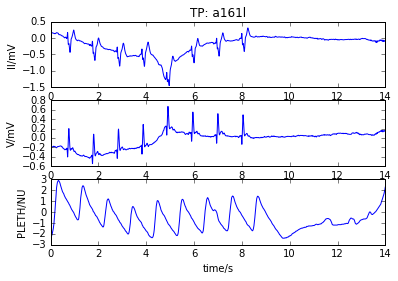

In [17]:
sample_name = "a161l"
classify_and_plot(data_path, ann_path, sample_name, ecg_ann_type)

No annotations in specified sample range
No annotations in specified sample range


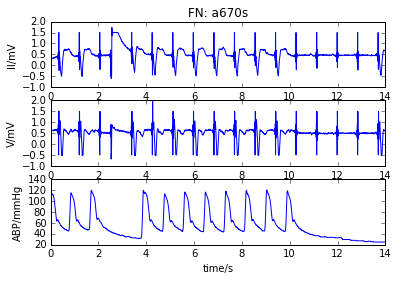

In [18]:
sample_name = "a670s"
classify_and_plot(data_path, ann_path, sample_name, ecg_ann_type)